In [64]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

root_path = Path("../")
data_path = root_path / "data"
figures_path = Path("figures")

In [65]:
def prepare_dataset(dataset: pd.DataFrame) -> pd.DataFrame:
    dataset = dataset[dataset.User_Score != "tbd"]
    dataset["User_Score"] = dataset["User_Score"].astype("float")
    dataset.columns = [col.lower() for col in dataset.columns]
    dataset["year_of_release"] = pd.to_datetime(dataset["year_of_release"], format="%Y")
    return dataset

In [66]:
dataset_path = data_path / "dataset.csv"
df = pd.read_csv(dataset_path)
df = prepare_dataset(df)

/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_10350/1371379326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["User_Score"] = dataset["User_Score"].astype("float")
/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_10350/1371379326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['year_of_release'] = pd.to_datetime(dataset['year_of_release'], format='%Y')


In [67]:
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df.dtypes

name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
publisher                  object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
global_sales              float64
critic_score              float64
critic_count              float64
user_score                float64
user_count                float64
developer                  object
rating                     object
dtype: object

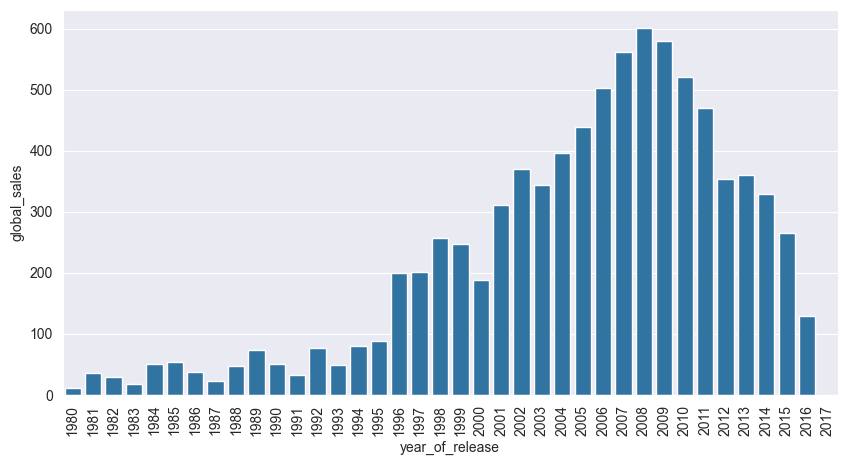

In [76]:
# grouped = df.groupby('year_of_release')['global_sales'].sum().reset_index()
grouped = df.groupby(df["year_of_release"].dt.year)["global_sales"].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
plot = sns.barplot(x="year_of_release", y="global_sales", data=grouped, ax=ax)

num_ticks = len(plot.get_xticks())
plot.set_xticks(np.arange(num_ticks))
plot.set_xticklabels([int(float(tick.get_text())) for tick in plot.get_xticklabels()], rotation=90)

plt.savefig(figures_path / f"global_sales_over_time.png", dpi=200, bbox_inches="tight")

plt.show()

/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_10350/2268533567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = data['year_of_release'].dt.year
/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_10350/2268533567.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(x = 'year_of_release', y = 'sales', hue='region', data=data, ci=None)


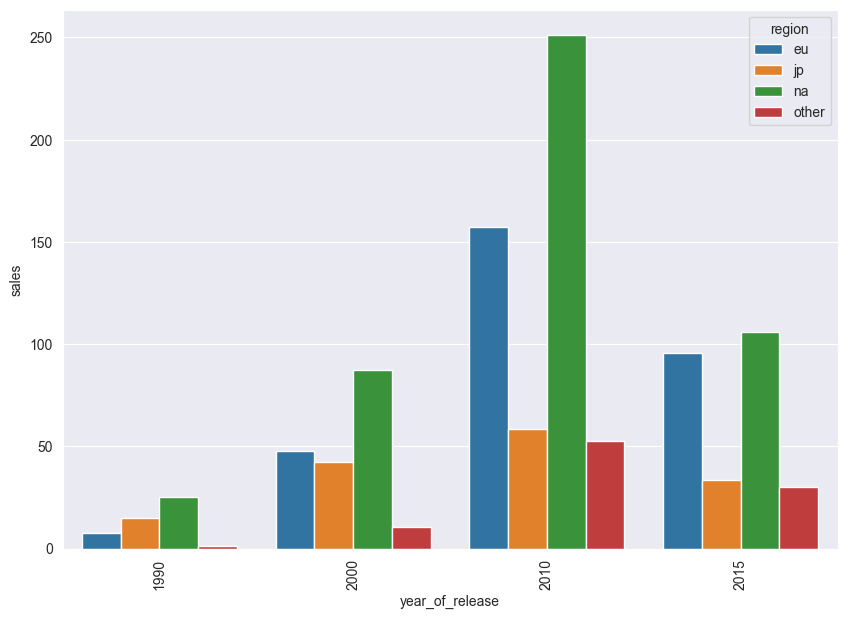

In [92]:
data = df[["year_of_release", "eu_sales", "jp_sales", "na_sales", "other_sales"]]
data["year_of_release"] = data["year_of_release"].dt.year
data = data[data.year_of_release.isin([1990.0,  2000.0, 2010.0, 2015.0])]

data = data.melt(id_vars="year_of_release", var_name="region", value_name="sales")

data["region"] = data["region"].str.replace("_sales", "")
data = data.groupby(["year_of_release", "region"])["sales"].sum().reset_index()

plt.figure(figsize=(10, 7))
plot = sns.barplot(x="year_of_release", y="sales", hue="region", data=data, ci=None)
num_ticks = len(plot.get_xticks())
plot.set_xticks(np.arange(num_ticks))
plot.set_xticklabels([int(float(tick.get_text())) for tick in plot.get_xticklabels()], rotation=90)

plt.savefig(figures_path / f"global_sales_over_time_in_regions.png", dpi=200, bbox_inches="tight")

plt.show()

/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_10350/3495335186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["year_of_release"] = data["year_of_release"].dt.year
/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_10350/3495335186.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_yearly_sales = yearly_sales.groupby("year_of_release").apply(lambda x: x.sort_values("global_sales", ascending=False).head(5))
/var/folders/jq/

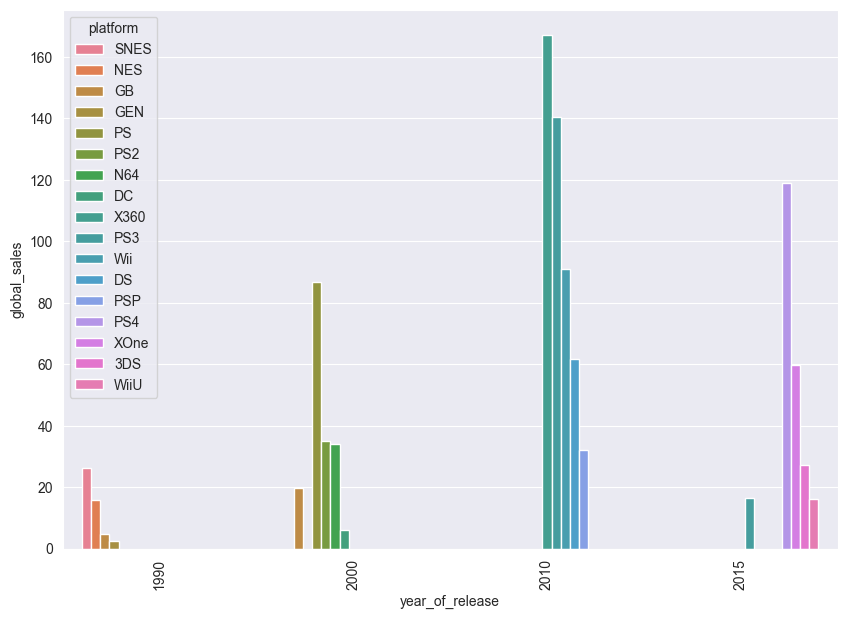

In [106]:
data = df[["year_of_release", "global_sales", "platform"]]
data["year_of_release"] = data["year_of_release"].dt.year
data = data[data.year_of_release.isin([1990.0, 2000.0, 2010.0, 2015.0])]

yearly_sales = data.groupby(["year_of_release", "platform"])["global_sales"].sum().reset_index()

top_yearly_sales = yearly_sales.groupby("year_of_release").apply(
    lambda x: x.sort_values("global_sales", ascending=False).head(5)
)

top_yearly_sales.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 7))
plot = sns.barplot(x="year_of_release", y="global_sales", hue="platform", data=top_yearly_sales, ci=None)
num_ticks = len(plot.get_xticks())
plot.set_xticks(np.arange(num_ticks))
plot.set_xticklabels([int(float(tick.get_text())) for tick in plot.get_xticklabels()], rotation=90)

plt.savefig(figures_path / f"global_sales_over_time_platform.png", dpi=200, bbox_inches="tight")

plt.show()